In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")

In [2]:
import pandas as pd
import numpy as np

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
import seaborn as sns


In [6]:
abs_freq = df['pclass'].value_counts().sort_index()
rel_freq = df['pclass'].value_counts(normalize=True).sort_index() * 100
cum_freq = abs_freq.cumsum()

# Combine into a single DataFrame
freq_table = pd.DataFrame({
    'Absolute Frequency': abs_freq,
    'Relative Frequency (%)': rel_freq.round(2),
    'Cumulative Frequency': cum_freq
})


In [7]:
freq_table


,Absolute Frequency,Relative Frequency (%),Cumulative Frequency
pclass,,,
1,216,24.24,216
2,184,20.65,400
3,491,55.11,891


In [10]:
abs_freq = df['embarked'].value_counts().sort_index()
rel_freq = df['embarked'].value_counts(normalize=True).sort_index() * 100
cum_freq = abs_freq.cumsum()

# Combine into a single DataFrame
freq_table = pd.DataFrame({
    'Absolute Frequency': abs_freq,
    'Relative Frequency (%)': rel_freq.round(2),
    'Cumulative Frequency': cum_freq
})


In [11]:
freq_table

,Absolute Frequency,Relative Frequency (%),Cumulative Frequency
embarked,,,
C,168,18.90,168
Q,77,8.66,245
S,644,72.44,889


In [12]:
contingency_table = pd.crosstab(df['sex'], df['survived'])


print(contingency_table)

survived    0    1
sex               
female     81  233
male      468  109


In [13]:
len(df['sex'])

891

In [14]:
joint_prob = len(df[(df['sex'] == 'female') & (df['survived'] == 1)]) / len(df)
print("Joint Probability P(Sex = female, Survived = 1):", round(joint_prob, 4))


Joint Probability P(Sex = female, Survived = 1): 0.2615


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [17]:
# P(Sex = female)
p_female = len(df[df['sex'] == 'female']) / len(df)
print("Marginal Probability P(Sex = female):", round(p_female, 4))

# P(Survived = 1)
p_survived = len(df[df['survived'] == 1]) / len(df)
print("Marginal Probability P(Survived = 1):", round(p_survived, 4))


Marginal Probability P(Sex = female): 0.6476
Marginal Probability P(Survived = 1): 0.3838


In [18]:
# P(Survived = 1 | Sex = female)
female_df = df[df['sex'] == 'female']
cond_surv_given_female = len(female_df[female_df['survived'] == 1]) / len(female_df)
print("Conditional Probability P(Survived = 1 | Sex = female):", round(cond_surv_given_female, 4))

# P(Sex = female | Survived = 1)
survived_df = df[df['survived'] == 1]
cond_female_given_surv = len(survived_df[survived_df['sex'] == 'female']) / len(survived_df)
print("Conditional Probability P(Sex = female | Survived = 1):", round(cond_female_given_surv, 4))


Conditional Probability P(Survived = 1 | Sex = female): 0.742
Conditional Probability P(Sex = female | Survived = 1): 0.6813


In [19]:
numeric_df = df[['age', 'fare']].dropna()


In [20]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [21]:
pearson_corr = numeric_df.corr(method='pearson')
print("📌 Pearson Correlation Matrix:\n", pearson_corr)

📌 Pearson Correlation Matrix:
            age      fare
age   1.000000  0.096067
fare  0.096067  1.000000


In [23]:
import matplotlib.pyplot as plt

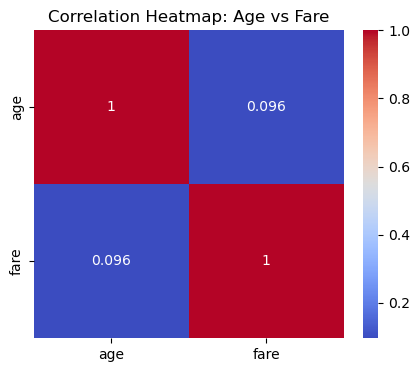

In [24]:
plt.figure(figsize=(5, 4))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: Age vs Fare")
plt.show()


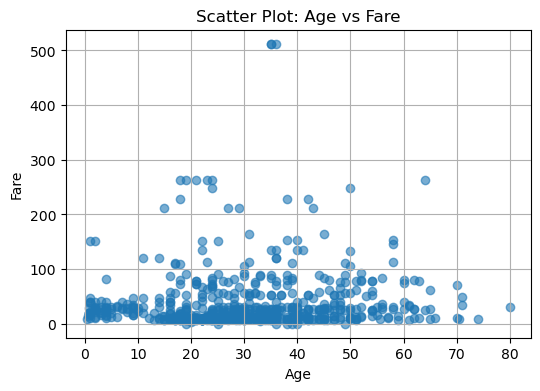

In [25]:
plt.figure(figsize=(6, 4))
plt.scatter(numeric_df['age'], numeric_df['fare'], alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot: Age vs Fare')
plt.grid(True)
plt.show()


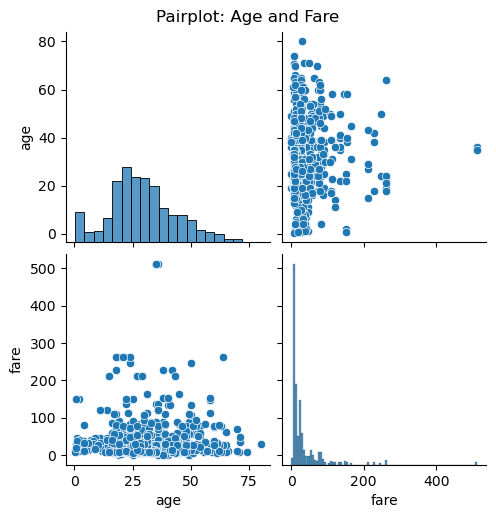

In [26]:
sns.pairplot(numeric_df)
plt.suptitle("Pairplot: Age and Fare", y=1.02)
plt.show()

In [29]:
subset_df = df[['survived', 'fare']].dropna()

# Compute Pearson correlation
correlation = subset_df.corr()
print("📌 Pearson Correlation between 'survived' and 'fare':", round(correlation, 4))

📌 Pearson Correlation between 'survived' and 'fare':           survived    fare
survived    1.0000  0.2573
fare        0.2573  1.0000


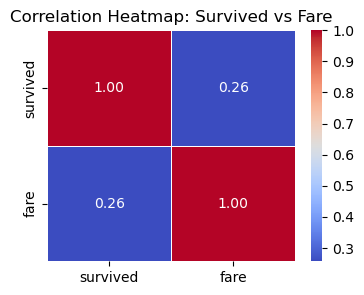

In [30]:
plt.figure(figsize=(4, 3))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap: Survived vs Fare")
plt.show()

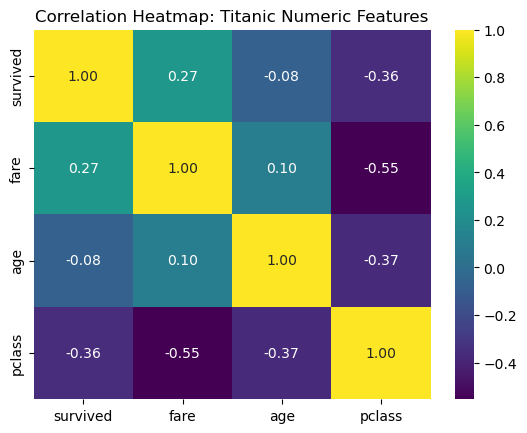

In [31]:
df_new = df[['survived', 'fare', 'age', 'pclass']].dropna()
sns.heatmap(df_new.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title("Correlation Heatmap: Titanic Numeric Features")
plt.show()

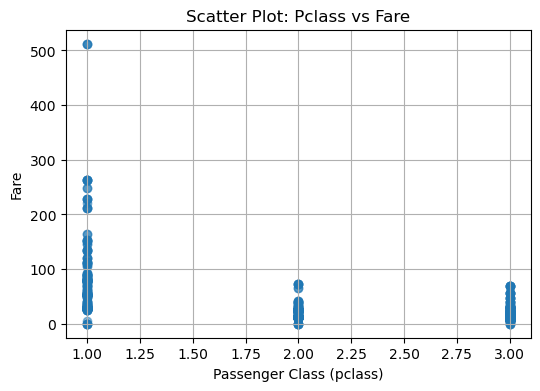

In [32]:
df_clean = df[['pclass', 'fare']].dropna()

# Scatter plot: pclass vs fare
plt.figure(figsize=(6, 4))
plt.scatter(df_clean['pclass'], df_clean['fare'], alpha=0.5)
plt.xlabel('Passenger Class (pclass)')
plt.ylabel('Fare')
plt.title('Scatter Plot: Pclass vs Fare')
plt.grid(True)
plt.show()

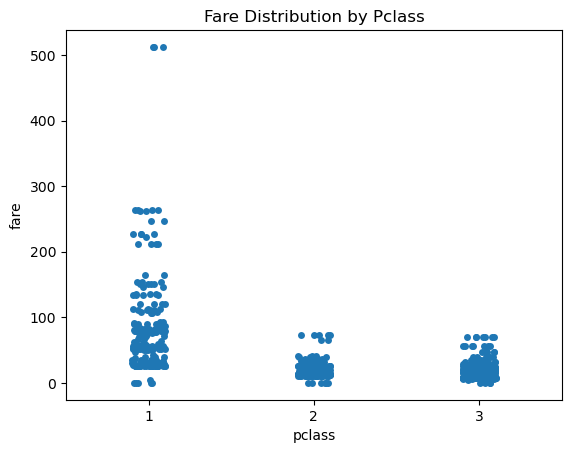

In [33]:
sns.stripplot(data=df, x='pclass', y='fare', jitter=True)
plt.title('Fare Distribution by Pclass')
plt.show()


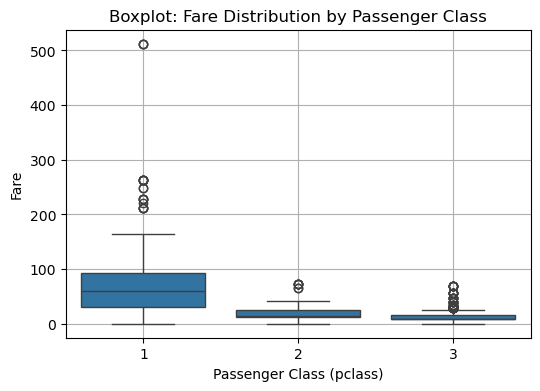

In [34]:
df_clean = df[['pclass', 'fare']].dropna()

# Boxplot: Fare vs Pclass
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_clean, x='pclass', y='fare')
plt.xlabel('Passenger Class (pclass)')
plt.ylabel('Fare')
plt.title('Boxplot: Fare Distribution by Passenger Class')
plt.grid(True)
plt.show()

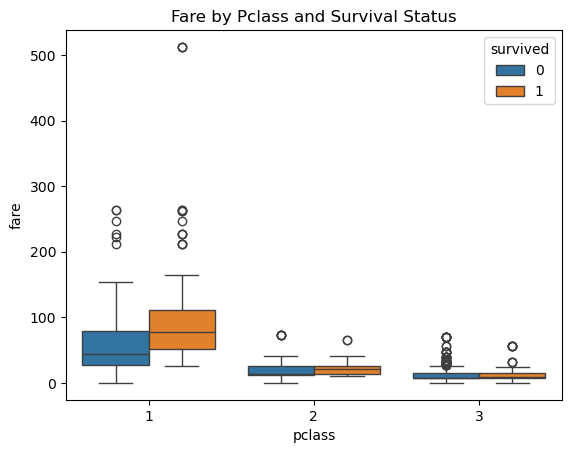

In [35]:
sns.boxplot(data=df, x='pclass', y='fare', hue='survived')
plt.title('Fare by Pclass and Survival Status')
plt.show()